## Linear Regression

- We want to present the relationship between (two) variables linearly

- For example, recall the running distance and drinking water 

- We are interested to obtain the best line describing by `y_pred[i] = w_1 x[i] +w_0` that map running distance to drinking water

Text(0,0.5,'Water Drinks (Litre)')

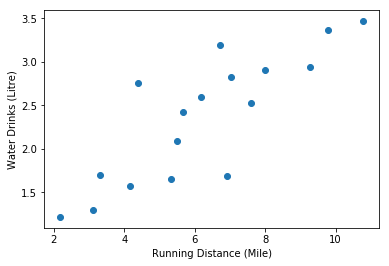

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## We should define error

- For linear relationship, mean-square-error (MSE) represents is it a good line (good model) or not  

- $E[i] = y_{pred}[i] - y[i]$

- $MSE = \frac{1}{N} \sum_{i=0}^{N-1} E[i]^2$

- $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

- $N = len(y)$

## Activity:

Obtain the MSE for 

1- `y_pred[i] = 0.7*x[i] + 0.3`

2- `y_pred[i] = 0.25163494*x[i] + 0.79880123`

Hint: Your function take four input arguments: 1- y, 2- x, 3- slope, 4-intercept

In [29]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y, x, 0.7, 0.3))

6.518593101764703


In [30]:
print(min_sq_error(y, x, 0.25163494, 0.79880123))

0.15385767404191164


## Mathematically:

$MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

$MSE = \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$ 

Compute: 

$\frac{\partial MSE}{\partial w_1}$ 

and

$\frac{\partial MSE}{\partial w_0}$

then obtain $w_1$ and $w_0$ such that :


$\frac{\partial MSE}{\partial w_1} = 0$ 

and

$\frac{\partial MSE}{\partial w_0} = 0$

## Activities:

<img src="activities.png" width="600" height="600">

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [16]:
print(slope)

0.25163494428355404


In [17]:
print(intercept)

0.7988012261753894


In [18]:
print("r-squared:", r_value**2)

r-squared: 0.6928760302783604


In [4]:
print(std_err)

0.0432568020417479


In [31]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    error  = [(i-j) for i,j in zip(y_pred, y)]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error/N
    return mse, error

print(min_sq_error(y, x, 0.25163494, 0.79880123)[1])

[-0.07080346800000004, -0.8540050339999998, 0.09279340000000014, -0.7027283226000001, 0.8486313642000001, 0.27461565992000003, -0.10646069174000017, -0.24159157091999983, 0.17871042459999975, 0.12309414497999982, -0.25618552252000004, 0.0491938675400001, 0.4857376662199999, -0.09287415482000005, -0.1984548192400002, 0.1914571237999998, 0.27886954399999997]


## Obtain the mean and std of error for optimal line

In [41]:
np.mean(min_sq_error(y, x, 0.25163494, 0.79880123)[1])
np.std(min_sq_error(y, x, 0.25163494, 0.79880123)[1])

0.39224695542720417

## Plot the distribution of the error for optimal line

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


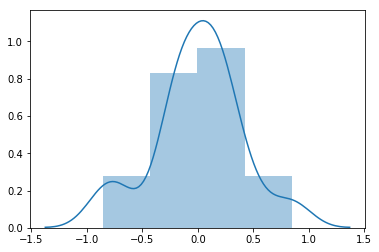

In [37]:
import seaborn as sns
sns.distplot(min_sq_error(y, x, 0.25163494, 0.79880123)[1], hist=True, kde=True, bins=4)

In [34]:
def f_r_sq(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    SS_res = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    SS_tot = sum([(i - np.mean(y))**2 for i in y])
    return 1- SS_res/SS_tot

print(f_r_sq(y, x, 0.25163494, 0.79880123))

0.692876030278359


## Derive the slope and intercept

- After taking partial derivative of mean-squared-error and setting to zero for both $w_1$ and $w_0$ ($\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$)

- $w_1 = \frac{{\bar xy} - {\bar x}{\bar y}}{\bar {x^2} - {\bar x}^2}$
- $w_0 = {\bar y} - w_1{\bar x}$

In [50]:
def slope_intercept_LR(x, y):
    w1 = (np.mean([i*j for i, j in zip(x, y)]) - np.mean(x)*np.mean(y))/(np.mean([i*i for i in x]) - np.mean(x)**2)
    w0= np.mean(y) - w1*np.mean(x)
    return w1, w0

print(slope_intercept_LR(x, y))

(0.25163494428355315, 0.7988012261753947)


## In almost all applications we update the slope and intercept through iteration

 - $w_1 = w_1 - \eta*\frac{\partial MSE}{\partial w_1}$
 - $w_0 = w_0 - \eta*\frac{\partial MSE}{\partial w_0}$

In [5]:
xx_bar = np.mean([i*i for i in x])
xy_bar = np.mean([i*j for i, j in zip(x, y)])                  
x_bar = np.mean(x)
y_bar = np.mean(y) 
                 
w_0 = np.random.randn()
w_1 = np.random.randn()
print(w_1)
print(w_0)
epoch = 5000
for _ in range(epoch):
    w_1 = w_1 - 0.01*(2*w_1*xx_bar + 2*w_0*x_bar-2*xy_bar)
    w_0 = w_0 - 0.01*(2*w_1*x_bar+2*w_0-2*y_bar)
print(w_1)
print(w_0)

-0.6054090863116374
0.08001160212963707
0.2516353668855077
0.7987982302621295


In [6]:
# optional reading
# It is better to have while loop, if |J(w1,w0) at n+1 ietration - J(w1,w0) at n ietration|<=eps stop the while loop
import numpy as np

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

N = len(y)
xx_bar = np.mean([i*i for i in x])
xy_bar = np.mean([i*j for i, j in zip(x, y)])                  
x_bar = np.mean(x)
y_bar = np.mean(y) 
                 
w_0 = np.random.randn()
w_1 = np.random.randn()

iteration = 0 
while True if iteration == 0 else np.abs(E2 - E1) >= 0.000000001:
    y_pred = [w_1*i + w_0 for i in x]
    error  = [(i-j) for i,j in zip(y_pred, y)]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    E1 = sum_squared_error/N 
    
    w_1 = w_1 - 0.01*(2*w_1*xx_bar + 2*w_0*x_bar-2*xy_bar)
    w_0 = w_0 - 0.01*(2*w_1*x_bar+2*w_0-2*y_bar)  
    
    y_pred = [w_1*i + w_0 for i in x]
    error  = [(i-j) for i,j in zip(y_pred, y)]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    E2 = sum_squared_error/N 
    
    iteration += 1
    
print(w_1)
print(w_0)
print(iteration)

0.2518148922529888
0.7975255375448015
2889
